In [2]:
import pandas as pd
df = pd.read_csv('sales_data.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.shape

(16598, 11)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [6]:
df.dropna(inplace = True)

In [7]:
df['Year'] = df['Year'].astype("Int64")

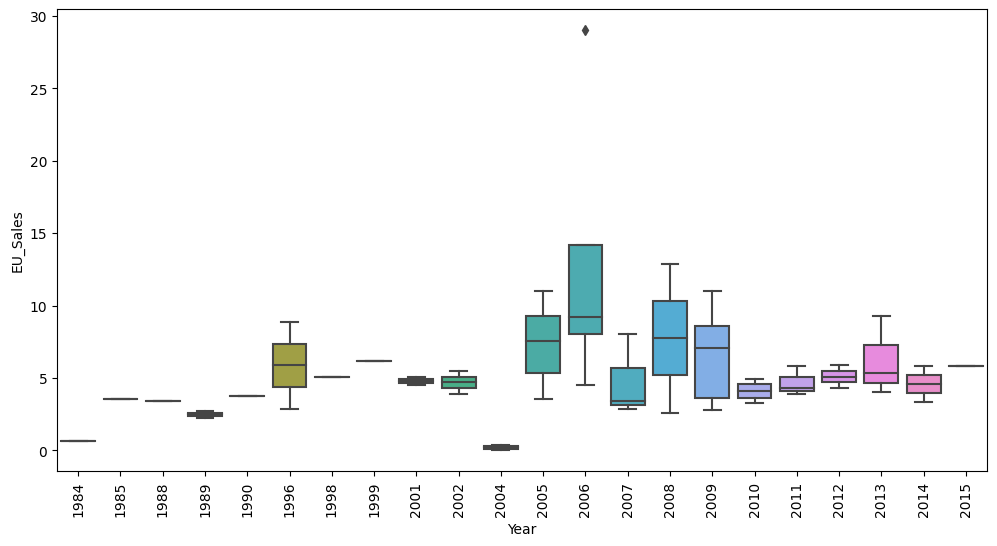

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Year', y= 'EU_Sales', data = df.head(50))
plt.xticks(rotation=90)
plt.show()

In [9]:
df.describe(include='object')

,Name,Platform,Genre,Publisher
count,16291,16291,16291,16291
unique,11325,31,12,576
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2131,3251,1339


In [78]:
def remove_outliers_iqr(data, threshold=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return data[(data >= lower_bound) & (data <= upper_bound)]
out_removed = remove_outliers_iqr(df['EU_Sales'])
df['EU_sales'] = out_removed

In [79]:
from scipy import stats
for param in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Global_Sales'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

NA_Sales
The Pearson Correlation Coefficient for  NA_Sales  is 0.9412692156418885  with a P-value of P = 0.0
EU_Sales
The Pearson Correlation Coefficient for  EU_Sales  is 0.9032637339929305  with a P-value of P = 0.0
JP_Sales
The Pearson Correlation Coefficient for  JP_Sales  is 0.6127741711193749  with a P-value of P = 0.0
Other_Sales
The Pearson Correlation Coefficient for  Other_Sales  is 0.747963906004537  with a P-value of P = 0.0
Global_Sales
The Pearson Correlation Coefficient for  Global_Sales  is 0.9999999999999616  with a P-value of P = 0.0


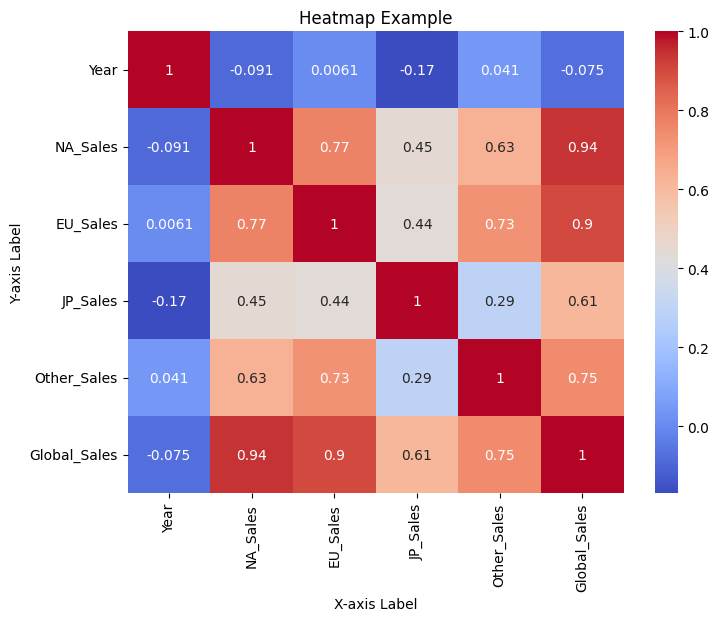

In [80]:
df1 = df[['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
plt.figure(figsize=(8, 6))  # Set the size of the heatmap
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')  # 'annot=True' to show the data values, 'cmap' for colormap
plt.title('Heatmap Example')  # Set the title of the heatmap
plt.xlabel('X-axis Label')  # Set the label for the x-axis
plt.ylabel('Y-axis Label')  # Set the label for the y-axis
plt.show()

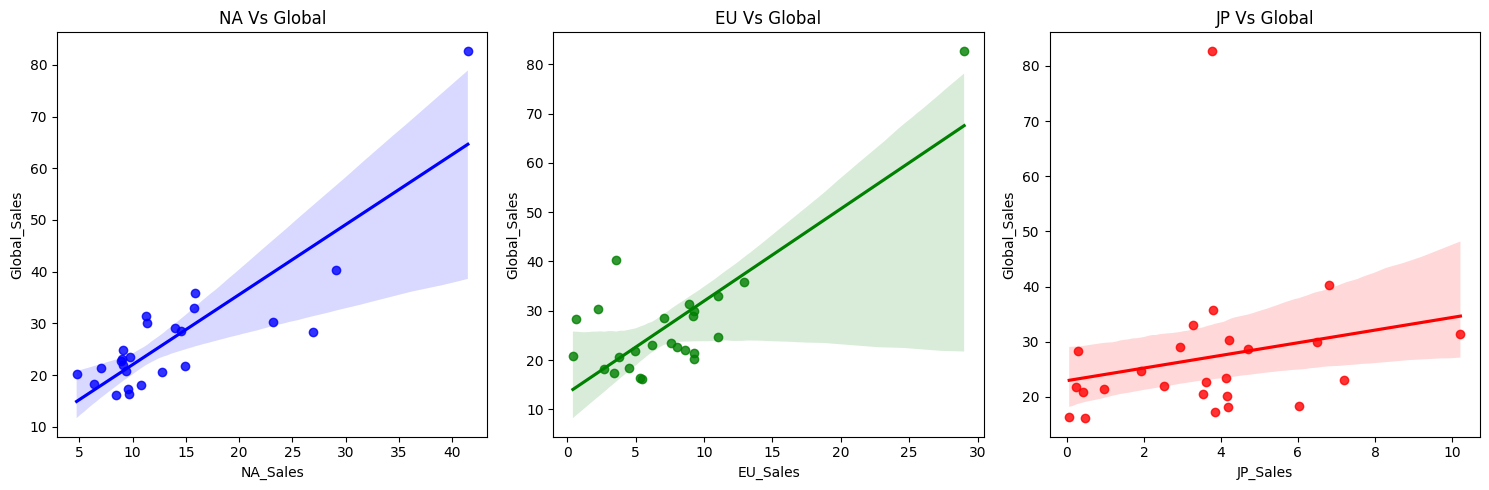

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Create a figure with 1 row and 2 columns

sns.regplot(x='NA_Sales', y='Global_Sales', data=df.head(25), color='blue', ax=axes[0])
axes[0].set_title('NA Vs Global')
axes[0].set_xlabel('NA_Sales')
axes[0].set_ylabel('Global_Sales')


sns.regplot(x='EU_Sales', y='Global_Sales', data=df.head(25), color='green', ax=axes[1])
axes[1].set_title('EU Vs Global')
axes[1].set_xlabel('EU_Sales')
axes[1].set_ylabel('Global_Sales')

sns.regplot(x='JP_Sales', y='Global_Sales', data=df.head(25), color='red', ax=axes[2])
axes[2].set_title('JP Vs Global')
axes[2].set_xlabel('JP_Sales')
axes[2].set_ylabel('Global_Sales')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

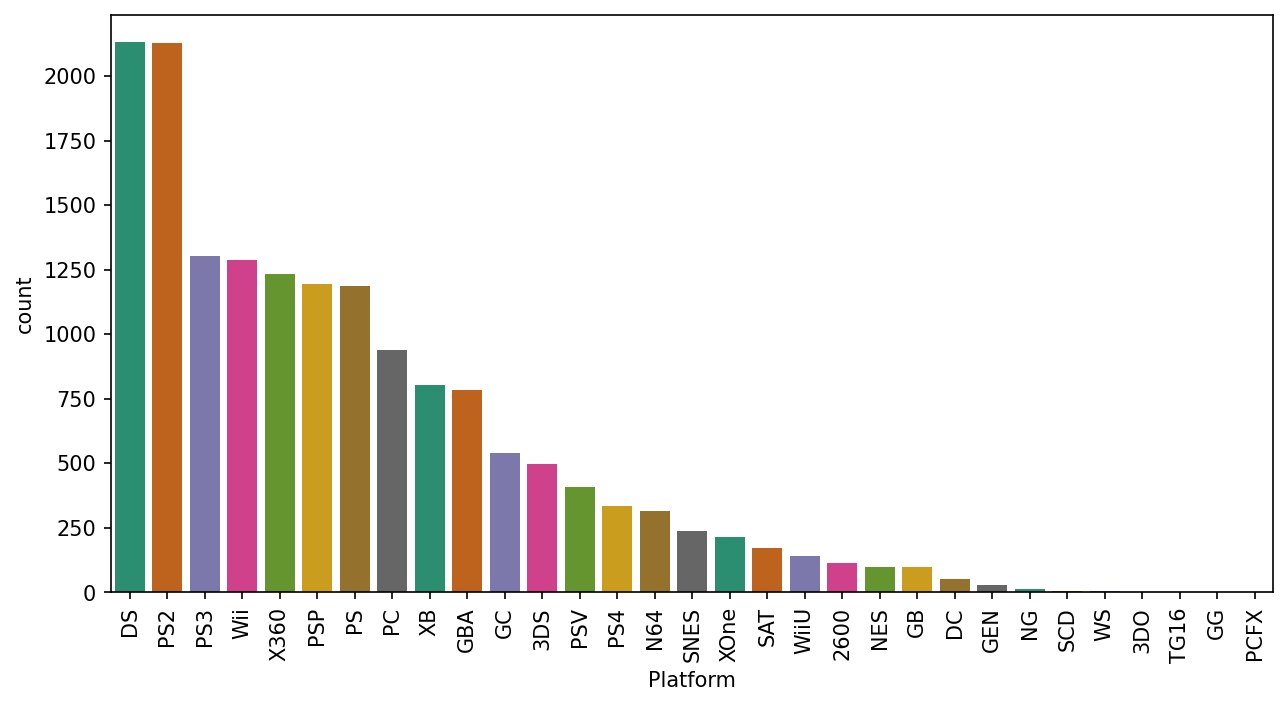

In [15]:
plt.figure(figsize=(10,5), dpi=150)
sns.countplot(data=df,x="Platform",order = df["Platform"].value_counts().index,palette="Dark2")
plt.xticks(rotation=90)
plt.show()

In [211]:
import numpy as np
X = df['NA_Sales'].values.reshape(-1, 1)
y = df['Global_Sales']
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X,y)

In [212]:
reg.score(X,y)

0.8859877363151507

In [213]:
reg.coef_

array([1.79381749])

In [214]:
reg.intercept_

0.06438866398565674

In [215]:
reg.predict(np.array([22.1]).reshape(-1,1))

array([39.70775527])

In [216]:
X_train = X[:-20]
X_test = X[:20]

In [217]:
y_train = y[:-20]
y_test = y[:20]

In [218]:
reg.fit(X_train,y_train)

LinearRegression()

In [219]:
y_pred = reg.predict(X_test)
print(y_pred)

[74.48869225 52.22779776 28.49599807 28.31661939 20.28045442 41.68033123
 20.47777097 25.23130605 26.23582667 48.37115609 16.3341234  17.66152565
 16.20855832 16.10093111 16.36999914 26.91746567 12.63892254 16.97988666
 22.98907252  8.58496432]


In [220]:
from sklearn.metrics import mean_squared_error, r2_score
# calculating the mean squared error
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error: %.2f" % mse)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error: %.2f" % rmse)

Mean squared error: 76.99
Coefficient of determination: 0.57
Root Mean Squared Error: 8.77


In [230]:
df['Total'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales']
X = df['Total'].values.reshape(-1, 1)
y = df['Global_Sales']
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X,y)

In [231]:
reg.score(X,y)

0.9922188671068604

In [232]:
reg.coef_

array([1.09112068])

In [233]:
reg.intercept_

0.003848675318647521

In [234]:
X_train = X[:-20]
X_test = X[:20]
y_train = X[:-20]
y_test = X[:20]

In [235]:
reg.fit(X_train,y_train)

LinearRegression()

In [236]:
y_pred = reg.predict(X_test)
print(y_pred)

[[74.28]
 [39.47]
 [32.52]
 [30.04]
 [30.38]
 [29.68]
 [27.11]
 [26.16]
 [26.35]
 [27.84]
 [22.  ]
 [21.51]
 [22.38]
 [20.57]
 [20.21]
 [20.15]
 [17.25]
 [10.24]
 [20.07]
 [18.17]]


In [237]:
from sklearn.metrics import mean_squared_error, r2_score
# calculating the mean squared error
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error: %.2f" % mse)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error: %.2f" % rmse)

Mean squared error: 0.00
Coefficient of determination: 1.00
Root Mean Squared Error: 0.00


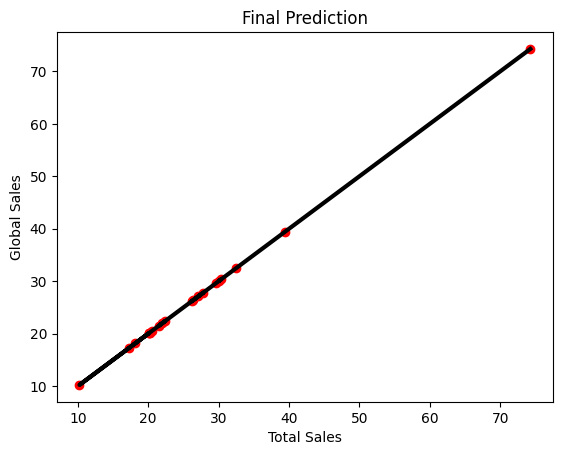

In [242]:
plt.scatter(X_test, y_test, color="red")
plt.plot(X_test, y_pred, color="black", linewidth=3)
plt.xlabel('Total Sales')
plt.ylabel('Global Sales')
plt.title('Final Prediction')
plt.show()